In [108]:
import pandas as pd
import numpy as np
import glob
import os
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
def extract_val(d, key):
    val_start = d.find(key)
    val_end = val_start + d[val_start:].find(",")
    val = d[val_start:val_end].split("=")[1]
    return val.replace("'", "")

def load_logs(logfile):
    with open(logfile, "r") as f:
        data = f.readlines()
    
    retdata = defaultdict(list)
    alg = None
    
    for d in data:
        if "data_kind" in d:
            data_kind = extract_val(d, "data_kind")
            inp_to_eval = extract_val(d, "inp_to_eval")
            
        if "-->" in d:
            linedata = d.split(" ")
            ehash = linedata[5]
            rt = float(linedata[-1].replace("\n", ""))
            rep = int(linedata[-3])
            retdata["ehash"].append(ehash)
            retdata["rt"].append(rt)
            retdata["rep"].append(rep)
            retdata["data_kind"].append(str(data_kind))
            retdata["inp_to_eval"].append(inp_to_eval)
    
    df = pd.DataFrame(retdata)
    return df

In [114]:
LOGDIR = "../results_n/"

In [115]:
fns = glob.glob(LOGDIR + "*.log")
dfs = []

for fn in fns:
    df = load_logs(fn)
    dfs.append(df)

In [116]:
df = pd.concat(dfs)

In [117]:
print(set(df["data_kind"]), set(df["inp_to_eval"]))
df

{'true_cols', 'test_shuffle', 'random_domain3', 'random_domain', 'random_domain2'} {'n', 'mi'}


,ehash,rt,rep,data_kind,inp_to_eval
0,1412706111350165054529954383171903240337882399016,0.129884,0,true_cols,n
1,845697540102295928657811596227970506096002273384,0.361089,0,true_cols,n
2,428479027960649776600128440654385951132899596406,0.122867,0,true_cols,n
3,84075949613328714275869842821526357397337767243,0.115254,0,true_cols,n
4,1331203710710213837019143823676324531895931998752,0.223589,0,true_cols,n
...,...,...,...,...,...
1495,1063466332439605995761783624533110685102934053128,0.123927,2,test_shuffle,n
1496,216408456000682405708249478876159637241851169399,0.146228,2,test_shuffle,n
1497,1425979425022617961196684811888845962957194079395,0.125531,2,test_shuffle,n
1498,207133359698626392416029221914781840852700798979,0.127424,2,test_shuffle,n


In [119]:
df = df[df.data_kind != 'random_domain']
df = df[df.inp_to_eval == 'n']

In [120]:
df.groupby(["data_kind"])["rt"].sum()

data_kind
random_domain2    540.087279
test_shuffle      407.319297
true_cols         485.521980
Name: rt, dtype: float64

In [121]:
df.groupby(["data_kind"])["rt"].describe(percentiles=[0.9, 0.99])

,count,mean,std,min,50%,90%,99%,max
data_kind,,,,,,,,
random_domain2,3000.0,0.180029,0.068513,0.132689,0.139201,0.267095,0.397302,0.515943
test_shuffle,3000.0,0.135773,0.021103,0.108076,0.126181,0.160742,0.202564,0.214050
true_cols,3000.0,0.161841,0.067526,0.111096,0.122614,0.269206,0.370432,0.507481


In [122]:
tmp = df.groupby(["ehash", "data_kind"])[["rt"]].mean().reset_index()

In [123]:
edf = tmp.set_index(['ehash', 'data_kind'])['rt'].unstack().reset_index()

<AxesSubplot:xlabel='test_shuffle', ylabel='true_cols'>

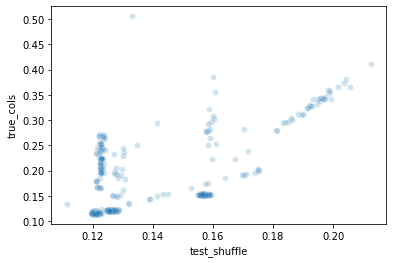

In [124]:
sns.scatterplot(data=edf, x = "test_shuffle", y="true_cols", alpha=0.2)

<AxesSubplot:xlabel='random_domain2', ylabel='true_cols'>

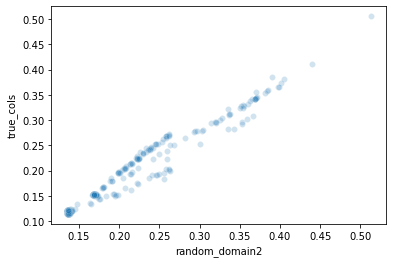

In [125]:
sns.scatterplot(data=edf, x = "random_domain2", y="true_cols", alpha=0.2)